In [12]:
project_dir = '../../'
data_dir = project_dir + 'data/'

import sys
sys.path.append(project_dir + 'NN/')

import numpy as np
import time
import matplotlib.pyplot as plt
from MLP import MLP

In [13]:
def one_hot_encoding(input_matrix):
    numclass=np.max(input_matrix,axis=0)
    matrix=np.zeros((len(input_matrix),int(np.sum(numclass))))
    for idx_row,row in enumerate(input_matrix):
        for idx_column,value in enumerate(row):
            matrix[idx_row,int(np.sum(numclass[:idx_column]))+int(value)-1]=1
    return matrix

# Monk 3

In [14]:
data_monk=np.loadtxt("../../data/MONK/monks-3.train",usecols=range(0,7))
labels=np.reshape(data_monk[:,0],(len(data_monk),1))
input_data=data_monk[:,1:]
input_data=one_hot_encoding(input_data)

data_monk_val=np.loadtxt("../../data/MONK/monks-3.test",usecols=range(0,7))
val_labels=np.reshape(data_monk_val[:,0],(len(data_monk_val),1))
val_data=data_monk_val[:,1:]
val_data=one_hot_encoding(val_data)

In [21]:
structure=[4,np.shape(labels)[1]]
act_func=[("sigmoid",1),("sigmoid",1)]
start=[0.3,0.3]

netw = MLP(structure, func=act_func,
           starting_points=start)

In [22]:
learning_rate=0.8
lamb=0.
N_epoch=1000
alpha=0.8
nesterov=False
batch_size=-1
netw.train(input_data, labels, val_data, val_labels,
        epoch = N_epoch,eta = learning_rate, lamb = lamb,alpha=alpha,
        nesterov=nesterov,batch_size=batch_size)

Epoch 1000:  [train MEE = 0.1057]  [val MEE = 0.1039]                              
Elapsed time: 1.089857816696167 s


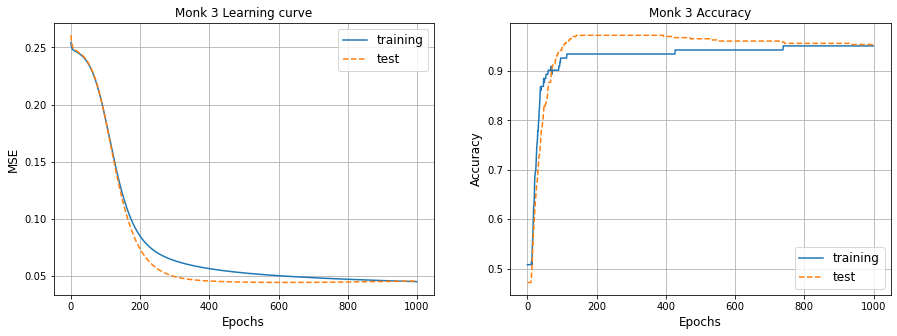

In [23]:
train_pred = netw.predict(input_data)
val_pred = netw.predict(val_data)

x = np.arange(len(netw.train_MEE))

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(x,netw.train_MSE,label="training")
plt.plot(x,netw.val_MSE,"--",label="test")
plt.title("Monk 3 Learning curve")
plt.xlabel("Epochs",fontsize="large")
plt.ylabel("MSE",fontsize="large")
plt.grid()
plt.legend(fontsize="large")

plt.subplot(122)
plt.plot(x,netw.train_accuracy,label="training")
plt.plot(x,netw.val_accuracy,"--",label="test")
plt.title ("Monk 3 Accuracy")
plt.ylabel("Accuracy",fontsize="large")
plt.xlabel("Epochs",fontsize="large")
plt.legend(fontsize="large")
plt.grid()

In [24]:
accuracy=[]
mse_tr=[]
mse_val=[]

In [25]:
lamb=0.
for i in range(60):
        print("Try: ",i)
        netw = MLP(structure, func=act_func,
                starting_points=start)
        netw.train(input_data, labels, val_data, val_labels,
                epoch = N_epoch,eta = learning_rate, lamb = lamb,alpha=alpha,
                nesterov=nesterov,batch_size=batch_size,verbose=False)
        accuracy.append(netw.val_accuracy[-1])
        mse_tr.append(netw.train_MSE[-1])
        mse_val.append(netw.val_MSE[-1])
        print("Accuracy: ",accuracy[-1])
        print("mean_std: ",np.mean(accuracy), " ", np.std(accuracy),"\n")
print(f"Accuracy: {np.mean(accuracy)} +- {np.std(accuracy)}\n MSE_tr: {np.mean(mse_tr)} +- {np.std(mse_tr)}\n MSE_val: {np.mean(mse_val)} +- {np.std(mse_val)}")

Try:  0
Epoch 1000:  [train MEE = 0.1075]  [val MEE = 0.1048]                              
Elapsed time: 0.33138465881347656 s
Accuracy:  0.9560185185185185
mean_std:  0.9560185185185185   0.0 

Try:  1
Epoch 1000:  [train MEE = 0.1078]  [val MEE = 0.1060]                              
Elapsed time: 0.3202478885650635 s
Accuracy:  0.9537037037037037
mean_std:  0.9548611111111112   0.0011574074074073848 

Try:  2
Epoch 1000:  [train MEE = 0.1112]  [val MEE = 0.1086]                              
Elapsed time: 0.3491194248199463 s
Accuracy:  0.9560185185185185
mean_std:  0.9552469135802469   0.001091214168497737 

Try:  3
Epoch 1000:  [train MEE = 0.1092]  [val MEE = 0.1069]                              
Elapsed time: 0.33370065689086914 s
Accuracy:  0.9537037037037037
mean_std:  0.9548611111111112   0.0011574074074073848 

Try:  4
Epoch 1000:  [train MEE = 0.1211]  [val MEE = 0.1190]                              
Elapsed time: 0.3240692615509033 s
Accuracy:  0.9537037037037037
mean_std

# Monk 3 with regularization

In [26]:
structure=[4,np.shape(labels)[1]]
act_func=[("sigmoid",1),("sigmoid",1)]
start=[0.3,0.3]

netw = MLP(structure, func=act_func,
           starting_points=start)

In [27]:
learning_rate=0.8
lamb=0.001
N_epoch=1000
alpha=0.8
nesterov=False
batch_size=-1
netw.train(input_data, labels, val_data, val_labels,
        epoch = N_epoch,eta = learning_rate, lamb = lamb,alpha=alpha,
        nesterov=nesterov,batch_size=batch_size)

Epoch 1000:  [train MEE = 0.1977]  [val MEE = 0.1871]                              
Elapsed time: 1.1156508922576904 s


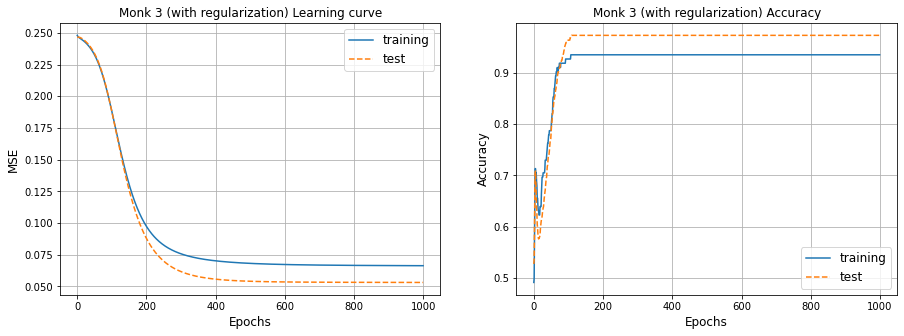

In [28]:
train_pred = netw.predict(input_data)
val_pred = netw.predict(val_data)

x = np.arange(len(netw.train_MEE))

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(x,netw.train_MSE,label="training")
plt.plot(x,netw.val_MSE,"--",label="test")
plt.title("Monk 3 (with regularization) Learning curve")
plt.xlabel("Epochs",fontsize="large")
plt.ylabel("MSE",fontsize="large")
plt.grid()
plt.legend(fontsize="large")

plt.subplot(122)
plt.plot(x,netw.train_accuracy,label="training")
plt.plot(x,netw.val_accuracy,"--",label="test")
plt.title ("Monk 3 (with regularization) Accuracy")
plt.ylabel("Accuracy",fontsize="large")
plt.xlabel("Epochs",fontsize="large")
plt.legend(fontsize="large")
plt.grid()

In [29]:
accuracy=[]
mse_tr=[]
mse_val=[]

In [30]:
lamb=0.001
for i in range(60):
        print("Try: ",i)
        netw = MLP(structure, func=act_func,
                starting_points=start)
        netw.train(input_data, labels, val_data, val_labels,
                epoch = N_epoch,eta = learning_rate, lamb = lamb,alpha=alpha,
                nesterov=nesterov,batch_size=batch_size,verbose=False)
        accuracy.append(netw.val_accuracy[-1])
        mse_tr.append(netw.train_MSE[-1])
        mse_val.append(netw.val_MSE[-1])
        print("Accuracy: ",accuracy[-1])
        print("mean_std: ",np.mean(accuracy), " ", np.std(accuracy),"\n")
print(f"Accuracy: {np.mean(accuracy)} +- {np.std(accuracy)}\n MSE_tr: {np.mean(mse_tr)} +- {np.std(mse_tr)}\n MSE_val: {np.mean(mse_val)} +- {np.std(mse_val)}")

Try:  0
Epoch 1000:  [train MEE = 0.2037]  [val MEE = 0.1939]                              
Elapsed time: 0.3587496280670166 s
Accuracy:  0.9722222222222222
mean_std:  0.9722222222222222   0.0 

Try:  1
Epoch 1000:  [train MEE = 0.1956]  [val MEE = 0.1849]                              
Elapsed time: 0.3466191291809082 s
Accuracy:  0.9722222222222222
mean_std:  0.9722222222222222   0.0 

Try:  2
Epoch 1000:  [train MEE = 0.1962]  [val MEE = 0.1854]                              
Elapsed time: 0.32898640632629395 s
Accuracy:  0.9722222222222222
mean_std:  0.9722222222222222   0.0 

Try:  3
Epoch 1000:  [train MEE = 0.1969]  [val MEE = 0.1864]                              
Elapsed time: 0.32750415802001953 s
Accuracy:  0.9722222222222222
mean_std:  0.9722222222222222   0.0 

Try:  4
Epoch 1000:  [train MEE = 0.1984]  [val MEE = 0.1879]                              
Elapsed time: 0.3253915309906006 s
Accuracy:  0.9722222222222222
mean_std:  0.9722222222222221   1.1102230246251565e-16 

Try: